In [1]:
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

wetlands_gdf = gpd.read_file('Data/NH_Wetlands_Geopackage.gpkg', layer='NH_Wetlands')
blooms_gdf = gpd.read_file("Data/aggregated_bloom_data_buffer_1km.gpkg")

wetlands_gdf = wetlands_gdf.to_crs("EPSG:3857")

In [7]:
wetlands_gdf.head()

,ATTRIBUTE,WETLAND_TYPE,ACRES,NWI_ID,geometry
0,L1UBH,Lake,51.356344,202409CSw{D91EC9A6-D26F-481B-AB64-124F1AA091A0...,"MULTIPOLYGON (((-7972298.749 5623063.785, -797..."
1,PEM1/SS1C,Freshwater Emergent Wetland,2.172405,202409CSw{BA6CBAD3-3995-42C5-BD75-13EF28888966...,"MULTIPOLYGON (((-7970783.735 5623008.171, -797..."
2,PEM1/SS1E,Freshwater Emergent Wetland,6.293036,202409CSw{4B841E15-3327-4FDF-A8BB-22AD968EBFF4...,"MULTIPOLYGON (((-7961892.627 5612642.816, -796..."
3,PEM1A,Freshwater Emergent Wetland,1.336244,202409CSw{B24C3487-861A-4E6E-ACEA-7219C211A6CB...,"MULTIPOLYGON (((-7959563.697 5606617.885, -795..."
4,PEM1A,Freshwater Emergent Wetland,0.633088,202409CSw{5358BB0E-F6B1-428A-A98A-0E0064D6C780...,"MULTIPOLYGON (((-7961711.944 5614494.074, -796..."


In [4]:
blooms = blooms_gdf.copy()
wetlands = wetlands_gdf[wetlands_gdf['WETLAND_TYPE'].isin(["Estuarine and Marine Wetland",
                                                          "Freshwater Emergent Wetland",
                                                          "Freshwater Forested/Shrub Wetland"])]

In [5]:
wetlands_within_buffers = gpd.sjoin(wetlands, blooms, how='inner', predicate='intersects')

In [16]:
wetlands_within_buffers.to_file("Data/wetlands_within_buffers.gpkg", driver='GPKG')

In [73]:
wetlands_within_buffers

,ATTRIBUTE_left,WETLAND_TYPE_left,ACRES_left,NWI_ID_left,geometry,index_right,date_advisory_issued,lake,town,dominant_taxa,...,Shape_Length,Shape_Area,permanent_identifier,gnis_id,areasqkm,elevation,ATTRIBUTE_right,WETLAND_TYPE_right,ACRES_right,NWI_ID_right
1318,PEM1Eh,Freshwater Emergent Wetland,0.259662,202409CSw{D9121EDE-B96F-4BB4-8407-4842F89A030C...,"MULTIPOLYGON (((-7907151.056 5575260.450, -790...",587,2023-06-13,Umbagog Lake,Errol,Photo,...,0.731330,0.002156,118181950,00870563,18.971610,NaN,"L2ABH,L1UBHh,L1ABHh,L1UBH,L2UBHh,L2USCh,L2UBH",Lake,7419.571276,202409CSw{27B70BBA-5262-4423-95A9-3064D3E57325...
1319,PEM1Eh,Freshwater Emergent Wetland,0.231497,202409CSw{205A593E-F3B9-411A-ACBD-3D6F223EA321...,"MULTIPOLYGON (((-7907109.730 5575245.934, -790...",587,2023-06-13,Umbagog Lake,Errol,Photo,...,0.731330,0.002156,118181950,00870563,18.971610,NaN,"L2ABH,L1UBHh,L1ABHh,L1UBH,L2UBHh,L2USCh,L2UBH",Lake,7419.571276,202409CSw{27B70BBA-5262-4423-95A9-3064D3E57325...
1320,PEM1Eh,Freshwater Emergent Wetland,1.010572,202409CSw{1A193DE4-6704-4F3B-A972-CBFAF6450E9F...,"MULTIPOLYGON (((-7906876.217 5575366.228, -790...",587,2023-06-13,Umbagog Lake,Errol,Photo,...,0.731330,0.002156,118181950,00870563,18.971610,NaN,"L2ABH,L1UBHh,L1ABHh,L1UBH,L2UBHh,L2USCh,L2UBH",Lake,7419.571276,202409CSw{27B70BBA-5262-4423-95A9-3064D3E57325...
1321,PEM1Eh,Freshwater Emergent Wetland,0.637620,202409CSw{B73D9708-ADCF-4AB5-865A-63ED368BCF36...,"MULTIPOLYGON (((-7906565.823 5575357.135, -790...",587,2023-06-13,Umbagog Lake,Errol,Photo,...,0.731330,0.002156,118181950,00870563,18.971610,NaN,"L2ABH,L1UBHh,L1ABHh,L1UBH,L2UBHh,L2USCh,L2UBH",Lake,7419.571276,202409CSw{27B70BBA-5262-4423-95A9-3064D3E57325...
1325,PEM1Eh,Freshwater Emergent Wetland,0.234092,202409CSw{19647A45-D601-4523-AC97-214B6CCC1DC6...,"MULTIPOLYGON (((-7907382.003 5579730.711, -790...",587,2023-06-13,Umbagog Lake,Errol,Photo,...,0.731330,0.002156,118181950,00870563,18.971610,NaN,"L2ABH,L1UBHh,L1ABHh,L1UBH,L2UBHh,L2USCh,L2UBH",Lake,7419.571276,202409CSw{27B70BBA-5262-4423-95A9-3064D3E57325...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258644,PFO4E,Freshwater Forested/Shrub Wetland,1.174040,202409CSw{7500796C-6881-4EB4-A0DC-1CBCB0033F58...,"MULTIPOLYGON (((-8063658.111 5297363.180, -806...",536,2020-10-07,Spofford Lake,Chesterfield,None,...,0.106517,0.000327,111888875,00870094,2.962678,218.0,"L2UBH,L1UBH",Lake,733.390390,202409CSw{0AA635C6-4B06-437A-91D8-F7DF3892D604...
258644,PFO4E,Freshwater Forested/Shrub Wetland,1.174040,202409CSw{7500796C-6881-4EB4-A0DC-1CBCB0033F58...,"MULTIPOLYGON (((-8063658.111 5297363.180, -806...",535,2020-09-10,Spofford Lake,Chesterfield,"Scytonema, Stigonema, Tolypothrix, Lyngbya",...,0.106517,0.000327,111888875,00870094,2.962678,218.0,"L2UBH,L1UBH",Lake,733.390390,202409CSw{0AA635C6-4B06-437A-91D8-F7DF3892D604...
258644,PFO4E,Freshwater Forested/Shrub Wetland,1.174040,202409CSw{7500796C-6881-4EB4-A0DC-1CBCB0033F58...,"MULTIPOLYGON (((-8063658.111 5297363.180, -806...",539,2022-07-20,Spofford Lake,Chesterfield,Benthic,...,0.106517,0.000327,111888875,00870094,2.962678,218.0,"L2UBH,L1UBH",Lake,733.390390,202409CSw{0AA635C6-4B06-437A-91D8-F7DF3892D604...
258650,PFO1/4E,Freshwater Forested/Shrub Wetland,6.119654,202409CSw{3DB5677F-DB89-4312-93AD-8F1410D50F12...,"MULTIPOLYGON (((-8050416.030 5302220.728, -805...",626,2021-10-07,Wilson Pond,Salem,None,...,0.033094,0.000032,136897612,00870929,0.293135,145.0,"L1UBHh,PUBHh","Lake,Freshwater Pond",83.805818,202409CSw{68EDEF4B-CF1B-4D02-9268-03741B185FD8...


In [77]:
# Group by lake and date_advisory_issued (or any other columns) and sum the 'ACRES' values
wetland_area_by_lake = wetlands_within_buffers.groupby(['NWI_ID_right'], as_index=False).agg({
    'lake': 'first', 'town': 'first', 'Shape_Area': 'first', 'advisory_days': 'max', 'elevation': 'first', 'ATTRIBUTE_right': 'first', 'ACRES_right': 'first',
    'ACRES_left': 'sum', 'date_advisory_issued': 'nunique', 'geometry': 'first'  # Replace 'other_columns' with actual columns you want to aggregate or keep
})
wetland_area_by_lake.rename(columns={'ACRES_left': 'Wetland_coverage', 'ACRES_right': 'Lake_size', 'date_advisory_issued': 'Bloom_count'}, inplace=True)
# Check the result
wetland_area_by_lake


,NWI_ID_right,lake,town,Shape_Area,advisory_days,elevation,ATTRIBUTE_right,Lake_size,Wetland_coverage,Bloom_count,geometry
0,202409CSw{003D6BB8-22C1-4784-A08F-D10F81848F4B...,Russell Reservoir,Harrisville,0.000012,NaN,NaN,"L1UBH,L2UBH",27.695900,75.787729,2,"MULTIPOLYGON (((-8031776.930 5301771.157, -803..."
1,202409CSw{02868565-96B0-4B8C-8280-9DAEDD0A2ACC...,"Warren, Lake",Alstead,0.000087,32.0,366.0,"L2ABH,L1UBH,L2UBH",195.278188,388.995355,5,"MULTIPOLYGON (((-8047108.094 5327743.779, -804..."
2,202409CSw{02BA58B2-906F-4766-8E70-54B562252BC5...,Rock Pond,Windham,0.000003,7.0,46.6,"L1ABHh,L1UBHh,PUBH",42.136143,137.783421,1,"MULTIPOLYGON (((-7930030.023 5580540.096, -793..."
3,202409CSw{057D47F4-5927-4ED9-9481-166611F97FA2...,Marsh Pond,"New Durham, Alton",0.000009,70.0,157.0,"L1UBHb,L1ABHb,PUBH",41.557363,987.975000,5,"MULTIPOLYGON (((-7924116.817 5383289.004, -792..."
4,202409CSw{060AFD77-2BD5-4856-B111-7FCDC340BBA1...,Pine Island Pond,Manchester,0.000024,7.0,45.7,"L1UBHh,L1ABHh",52.863711,16.398207,1,"MULTIPOLYGON (((-7952682.027 5302790.439, -795..."
...,...,...,...,...,...,...,...,...,...,...,...
131,202409CSw{F8BE4CDD-38F9-4C58-836E-8AE7F4B89818...,White Oak Pond,Holderness,0.000133,32.0,178.6,"L2ABH,L2UBH,L1UBH",306.899964,1189.658573,6,"MULTIPOLYGON (((-7965977.230 5422909.128, -796..."
132,202409CSw{F8FA3AD6-478F-4762-8D4E-B28360447E2E...,Nippo Pond,Barrington,0.000038,24.0,NaN,"L1UBH,L1ABH",89.347882,845.802173,6,"MULTIPOLYGON (((-7913115.865 5346478.642, -791..."
133,202409CSw{FD3F2276-EDCC-42CF-B8F5-8E6441442CD2...,Lower Suncook Lake,Barnstead,0.000133,NaN,167.9,L1UBHh,700.496634,133.077788,2,"MULTIPOLYGON (((-7931934.214 5369079.214, -793..."
134,202409CSw{FE9D141B-BA81-4C15-9ADB-97E176444202...,Tower Hill Pond,Auburn,0.000083,22.0,97.8,L1UBHh,206.088813,39.520490,1,"MULTIPOLYGON (((-7946766.707 5319345.276, -794..."


In [78]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

def transform_to_binary(df, column_name):
    """
    Transforms a column of lists in a DataFrame into a binary encoded matrix.

    Args:
        df (pd.DataFrame): The DataFrame containing the column of lists.
        column_name (str): The name of the column containing the lists.

    Returns:
        pd.DataFrame: The DataFrame with the binary encoded matrix.
    """
    mlb = MultiLabelBinarizer()

    # If the column is a single string (e.g., "L1ABH,L2UBH"), split it into a list of strings
    if isinstance(df[column_name].iloc[0], str):
        df[column_name] = df[column_name].str.split(',')

    # Apply MultiLabelBinarizer on the list column
    encoded_matrix = mlb.fit_transform(df[column_name])

    # Create a new DataFrame from the encoded matrix
    encoded_df = pd.DataFrame(encoded_matrix, columns=mlb.classes_)

    # Join the encoded DataFrame with the original DataFrame
    return df.join(encoded_df)

encoded = transform_to_binary(wetland_area_by_lake, 'ATTRIBUTE_right')
encoded

,NWI_ID_right,lake,town,Shape_Area,advisory_days,elevation,ATTRIBUTE_right,Lake_size,Wetland_coverage,Bloom_count,...,L2USCh,PAB/EM1F,PABF,PABFb,PABH,PABHb,PABHh,PUBH,PUBHb,PUBHh
0,202409CSw{003D6BB8-22C1-4784-A08F-D10F81848F4B...,Russell Reservoir,Harrisville,0.000012,NaN,NaN,"[L1UBH, L2UBH]",27.695900,75.787729,2,...,0,0,0,0,0,0,0,0,0,0
1,202409CSw{02868565-96B0-4B8C-8280-9DAEDD0A2ACC...,"Warren, Lake",Alstead,0.000087,32.0,366.0,"[L2ABH, L1UBH, L2UBH]",195.278188,388.995355,5,...,0,0,0,0,0,0,0,0,0,0
2,202409CSw{02BA58B2-906F-4766-8E70-54B562252BC5...,Rock Pond,Windham,0.000003,7.0,46.6,"[L1ABHh, L1UBHh, PUBH]",42.136143,137.783421,1,...,0,0,0,0,0,0,0,1,0,0
3,202409CSw{057D47F4-5927-4ED9-9481-166611F97FA2...,Marsh Pond,"New Durham, Alton",0.000009,70.0,157.0,"[L1UBHb, L1ABHb, PUBH]",41.557363,987.975000,5,...,0,0,0,0,0,0,0,1,0,0
4,202409CSw{060AFD77-2BD5-4856-B111-7FCDC340BBA1...,Pine Island Pond,Manchester,0.000024,7.0,45.7,"[L1UBHh, L1ABHh]",52.863711,16.398207,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,202409CSw{F8BE4CDD-38F9-4C58-836E-8AE7F4B89818...,White Oak Pond,Holderness,0.000133,32.0,178.6,"[L2ABH, L2UBH, L1UBH]",306.899964,1189.658573,6,...,0,0,0,0,0,0,0,0,0,0
132,202409CSw{F8FA3AD6-478F-4762-8D4E-B28360447E2E...,Nippo Pond,Barrington,0.000038,24.0,NaN,"[L1UBH, L1ABH]",89.347882,845.802173,6,...,0,0,0,0,0,0,0,0,0,0
133,202409CSw{FD3F2276-EDCC-42CF-B8F5-8E6441442CD2...,Lower Suncook Lake,Barnstead,0.000133,NaN,167.9,[L1UBHh],700.496634,133.077788,2,...,0,0,0,0,0,0,0,0,0,0
134,202409CSw{FE9D141B-BA81-4C15-9ADB-97E176444202...,Tower Hill Pond,Auburn,0.000083,22.0,97.8,[L1UBHh],206.088813,39.520490,1,...,0,0,0,0,0,0,0,0,0,0


136


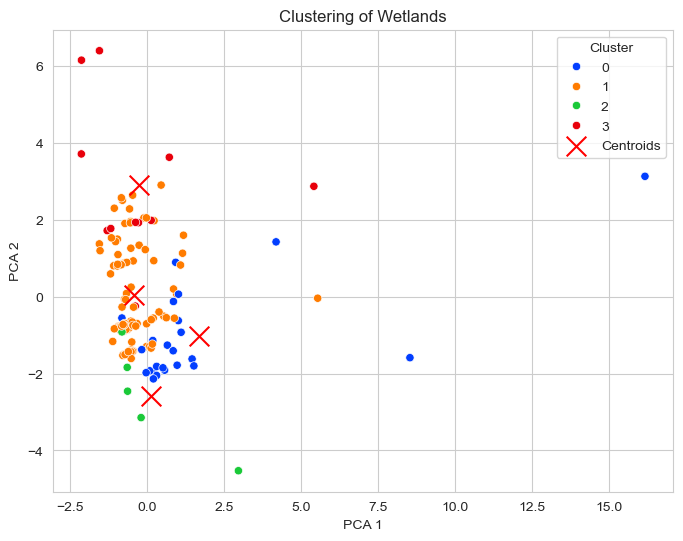

In [566]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

# Step 1: Select the relevant numerical columns for clustering
filtered_data = encoded.copy().reset_index()
features = filtered_data.drop(columns=['index', 'NWI_ID_right', 'lake', 'town', 'Shape_Area', 'ATTRIBUTE_right', 'geometry']).columns

# Subset the dataframe to only include the relevant features
X = filtered_data[features]

# Step 2: Standardize the features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 3: Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
filtered_data['cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=3)
pca_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(pca_components, columns=['PCA_1', 'PCA_2', 'PCA_3'])

filtered_data = pd.concat([filtered_data, pca_df], axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_data['PCA_1'], y=filtered_data['PCA_2'], hue=filtered_data['cluster'], palette='bright')
centroids = pca.transform(kmeans.cluster_centers_)  # Assuming 'kmeans' is your KMeans model
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering of Wetlands')
plt.legend(title='Cluster')
plt.show()

In [562]:
filtered_data['cluster'].value_counts()

cluster
1    96
0    24
3    11
2     5
Name: count, dtype: int64

In [563]:
import pandas as pd

pca_components = pd.DataFrame(
    pca.components_, 
    columns=filtered_data[features].columns, 
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Display the components to see which features contribute most to each principal component
print(pca_components)


     advisory_days  elevation  Lake_size  Wetland_coverage  Bloom_count  \
PC1       0.155228  -0.074087   0.208162          0.430179     0.345564   
PC2       0.006340  -0.044854  -0.050610          0.053404     0.108251   
PC3      -0.006983  -0.004459  -0.079765         -0.030964    -0.102138   

     L1AB/UBH     L1ABH    L1ABHb    L1ABHh    L1ABHx  ...    L2USCh  \
PC1 -0.025798  0.053654  0.356984  0.085251 -0.035873  ...  0.013020   
PC2 -0.035925 -0.042419  0.131466  0.316904  0.197430  ...  0.172290   
PC3 -0.001117  0.343849  0.089767 -0.104530  0.137962  ... -0.241722   

     PAB/EM1F      PABF     PABFb      PABH     PABHb     PABHh      PUBH  \
PC1  0.334523 -0.011407 -0.049552 -0.064007 -0.049462  0.091424 -0.034664   
PC2 -0.025772 -0.036358  0.114582  0.292751  0.189845  0.062612  0.225445   
PC3  0.131963  0.042500  0.279847  0.302474  0.287160 -0.009363  0.250431   

        PUBHb     PUBHh  
PC1 -0.068807  0.283988  
PC2  0.223252  0.027197  
PC3  0.357574 -0.037077

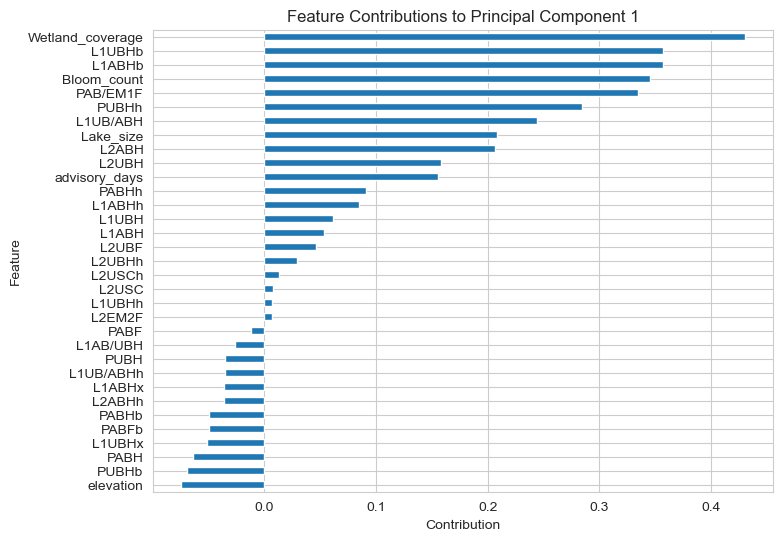

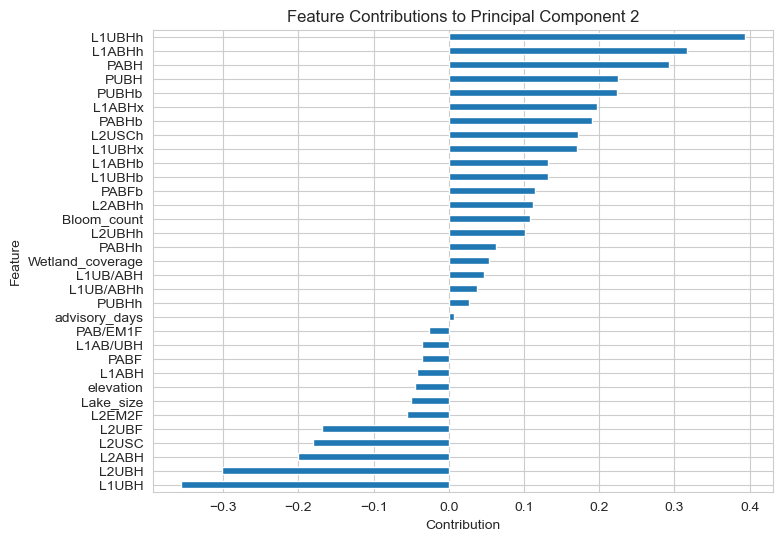

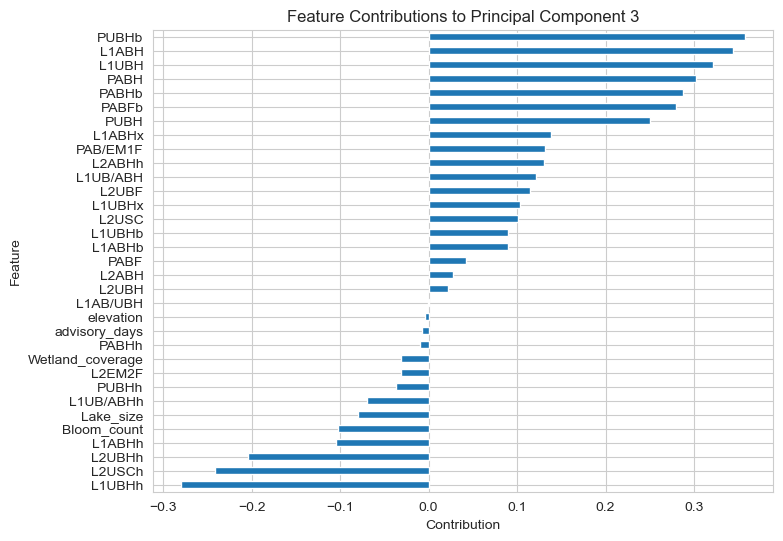

In [564]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert PCA components to a DataFrame for easy analysis
pca_components = pd.DataFrame(
    pca.components_, 
    columns=filtered_data[features].columns,  # Ensure this matches your features
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Plot feature contributions for the first two components
for i in range(3):  # Adjust range if you want to plot more components
    plt.figure(figsize=(8, 6))
    component = pca_components.iloc[i]  # Get the i-th principal component
    component.sort_values().plot(kind='barh')  # Sort for better visualization
    plt.title(f'Feature Contributions to Principal Component {i+1}')
    plt.xlabel('Contribution')
    plt.ylabel('Feature')
    plt.show()


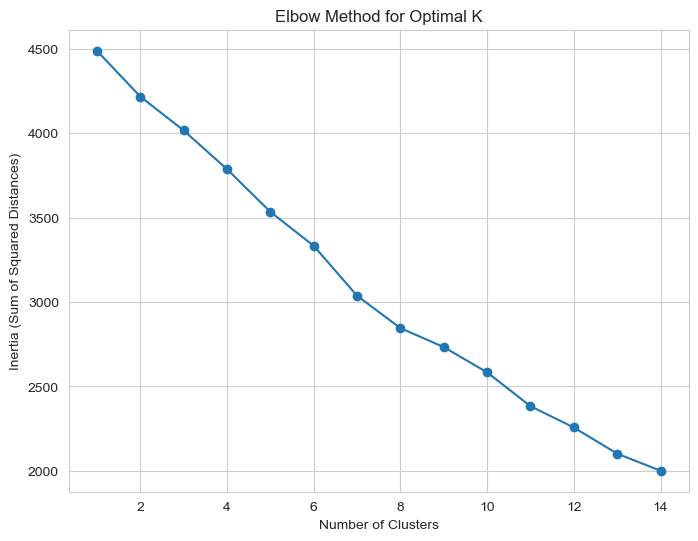

In [567]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Calculate the sum of squared distances (inertia) for a range of cluster numbers
inertia = []
for k in range(1, 15):  # Check for number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Step 2: Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


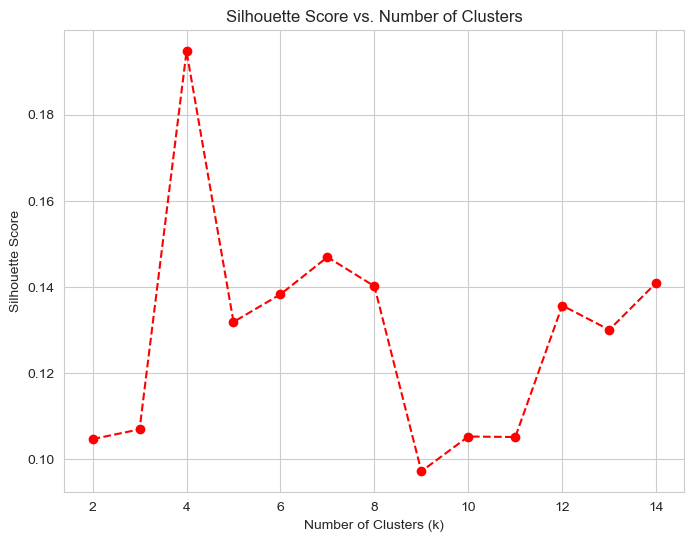

The optimal number of clusters is: 4


In [568]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store the number of clusters and corresponding silhouette scores
cluster_range = range(2, 15)
silhouette_scores = []

# Loop over the range of cluster numbers
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for each cluster number
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Find the optimal number of clusters (max silhouette score)
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is: {optimal_k}")


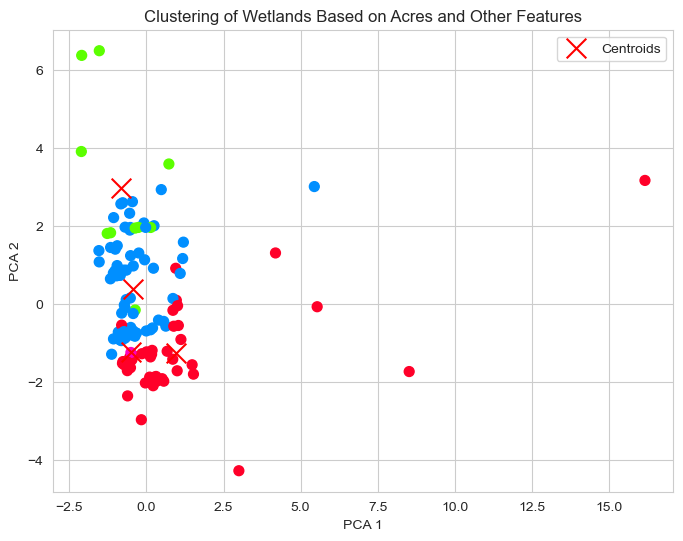

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

# Perform PCA to reduce dimensions
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_scaled)  # Add other relevant columns here

# Create the scatter plot with reduced dimensions
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=filtered_data['cluster'], cmap='gist_rainbow', s=50)

# Plot the cluster centroids
centroids = pca.transform(kmeans.cluster_centers_)  # Assuming 'kmeans' is your KMeans model
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')

# Enhance the plot with labels and colorbar
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering of Wetlands Based on Acres and Other Features')
plt.legend()

# Show the plot
plt.show()


In [216]:
# Transform into a geodatagrame and calculate area of each entry
filtered_data = gpd.GeoDataFrame(filtered_data, geometry='geometry')
filtered_data['area'] = filtered_data.geometry.area

In [232]:
# Create the Wetland Ratio feature
filtered_data['wetland_ratio'] = (filtered_data['Wetland_coverage'] / filtered_data['Lake_size'])
scaling_features = ['advisory_days', 'elevation', 'Lake_size', 'Wetland_coverage', 'wetland_ratio']
filtered_data[scaling_features]

,advisory_days,elevation,Lake_size,Wetland_coverage,wetland_ratio
0,NaN,NaN,27.695900,75.787729,2.736424
1,32.0,366.0,195.278188,388.995355,1.992006
2,7.0,46.6,42.136143,137.783421,3.269958
3,70.0,157.0,41.557363,987.975000,23.773765
4,7.0,45.7,52.863711,16.398207,0.310198
...,...,...,...,...,...
131,32.0,178.6,306.899964,1189.658573,3.876372
132,24.0,NaN,89.347882,845.802173,9.466393
133,NaN,167.9,700.496634,133.077788,0.189976
134,22.0,97.8,206.088813,39.520490,0.191764


In [247]:
filtered_data = filtered_data.reset_index(drop=True)

In [256]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Create pipeline to evaluate multiple models
X1 = filtered_data[scaling_features]
scaler_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

X_clean_scaled = scaler_pipeline.fit_transform(X1)
X_clean_scaled_df = pd.DataFrame(X_clean_scaled, columns=scaling_features)

In [257]:
# Create gdf for manipulation and modeling
scaled_gdf = filtered_data.copy()
scaled_gdf[scaling_features] = X_clean_scaled_df

In [693]:
from sklearn.model_selection import train_test_split

x_features = ['elevation', 'Lake_size', 'Wetland_coverage', 'wetland_ratio']
X_values = scaled_gdf[x_features].reset_index(drop=True)
y_values = scaled_gdf['Bloom_count']

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.25)
X_xgb = X_values

In [426]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 7.6867882352941175
R^2 Score: 0.4443864690802226


In [541]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the model
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 500, 600, 800],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2]
}

# Perform grid search with CV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate on test data
best_rf = grid_search.best_estimator_
rf_pred = best_rf.predict(X_test)
print("Test RMSE:", mean_squared_error(y_test, rf_pred, squared=False))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Test RMSE: 2.8751945973502337


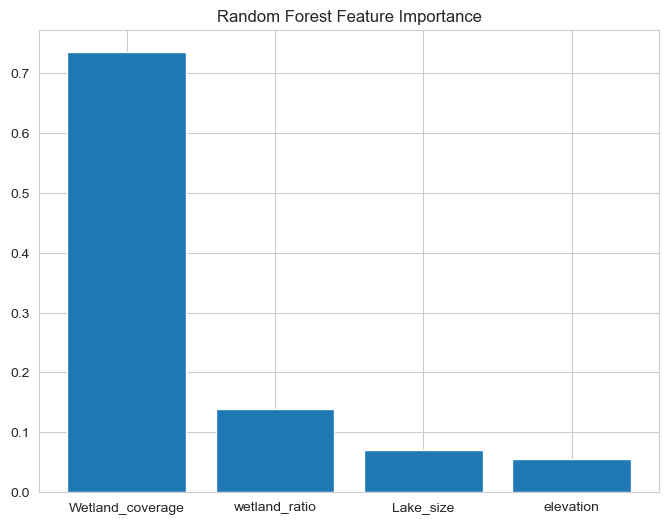

In [701]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(8,6))
plt.bar(X_values.columns[sorted_idx[::-1]], feature_importances[sorted_idx[::-1]])
plt.title("Random Forest Feature Importance")
plt.show()


In [543]:
print("RMSE:", mean_squared_error(y_test, rf_pred, squared=False))
print("R^2 Score:", r2_score(y_test, y_pred))

RMSE: 2.8751945973502337
R^2 Score: 0.7281102437194766


In [518]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gb = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100],
    'learning_rate': [0.2, 0.25, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.5, 0.7, 0.85, 1]
}

# Perform grid search with CV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate on test data
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print('Test R^2:', r2_score(y_test, y_pred))


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters: {'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 90, 'subsample': 0.85}
Test RMSE: 3.046656973219357
Test R^2: 0.7281102437194766


In [521]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [130, 140, 150, 160, 170],
    'learning_rate': [0.03, 0.05, 0.06],
    'max_depth': [2, 3, 4],
    'subsample': [0.3, 0.4, 0.5, 0.6, 1],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6]
}

# Perform grid search with CV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

# Evaluate on test data
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
print("Test RMSE for XGBoost:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print('Test R^2 for XGBoost:', r2_score(y_test, y_pred_xgb))


Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best parameters for XGBoost: {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 140, 'subsample': 0.6}
Test RMSE for XGBoost: 2.61904279785957
Test R^2 for XGBoost: 0.7990764379501343


In [520]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the LightGBM model
lgb_model = lgb.LGBMRegressor()

# Define the hyperparameter grid for LightGBM
param_grid_lgb = {
    'n_estimators': [160, 170, 180],
    'learning_rate': [0.1, 0.15, 0.2],
    'max_depth': [3],
    'subsample': [0.001, 0.01],
    'num_leaves': [31, 63]
}

# Perform grid search with CV
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)

# Best parameters
print("Best parameters for LightGBM:", grid_search_lgb.best_params_)

# Evaluate on test data
best_lgb = grid_search_lgb.best_estimator_
y_pred_lgb = best_lgb.predict(X_test)
print("Test RMSE for LightGBM:", mean_squared_error(y_test, y_pred_lgb, squared=False))
print('Test R^2 for LightGBM:', r2_score(y_test, y_pred_lgb))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 102, number of used features: 4
[LightGBM] [Info] Start training from score 4.715686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


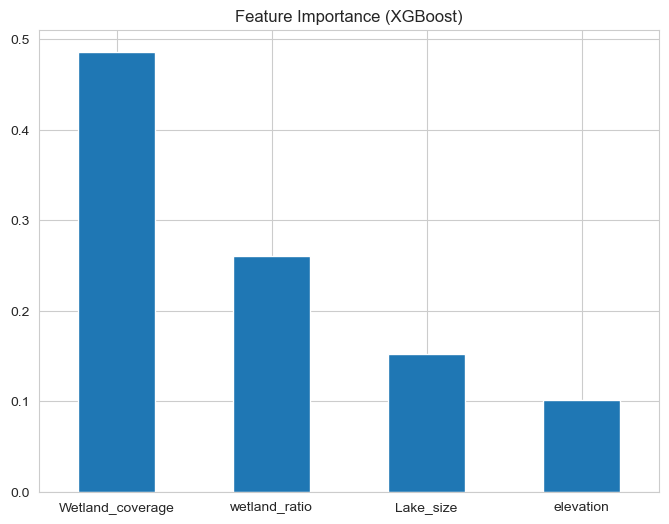

In [700]:
import matplotlib.pyplot as plt

# Plot feature importance
importance = pd.Series(best_xgb.feature_importances_, index=X_xgb.columns).sort_values(ascending=False)
importance.plot(kind='bar', figsize=(8, 6), title="Feature Importance (XGBoost)")
plt.xticks(rotation=0)
plt.show()


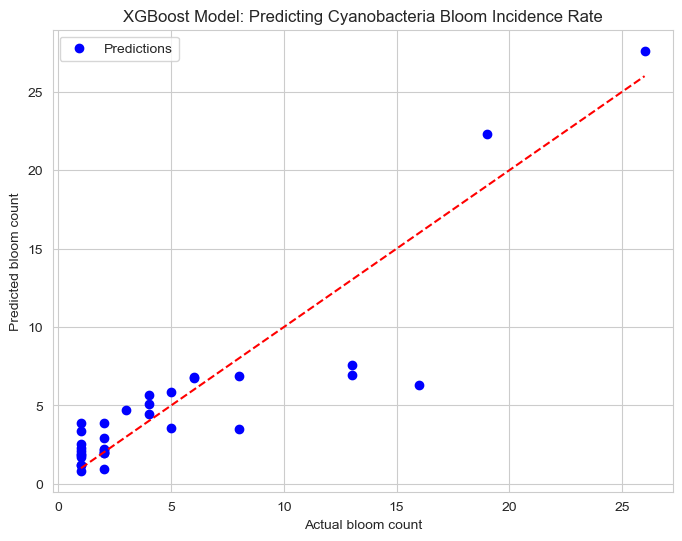

In [524]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', ls='--')
plt.xlabel('Actual bloom count')
plt.ylabel('Predicted bloom count')
plt.title('XGBoost Model: Predicting Cyanobacteria Bloom Incidence Rate')
plt.legend()
plt.show()


In [525]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Perform cross validation to evaluate XGBoost model
cv_scores = cross_val_score(best_xgb, X_values, y_values, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores
rmse_scores = np.sqrt(mse_scores)

print(f"Cross-validation scores (RMSE): {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.3f}")
print(f"Standard deviation: {rmse_scores.std():.3f}")

Cross-validation scores (RMSE): [3.37857031 2.09145032 2.1876036  3.51432437 2.78755797]
Mean RMSE: 2.792
Standard deviation: 0.587


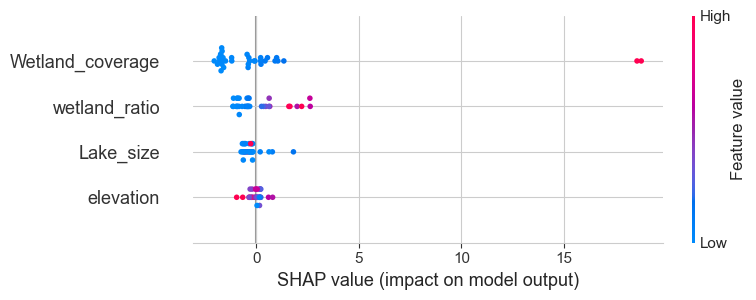

In [540]:
import shap

# Use the fitted XGBoost model
explainer = shap.TreeExplainer(best_xgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot summary plot
shap.summary_plot(shap_values, X_test)

In [140]:
# generate the Wetland Coverage metric to evaluate model performance
wetland_coverage = wetlands_within_buffers.groupby(['NWI_ID_right', 'lake'])['ACRES_left'].sum().reset_index()

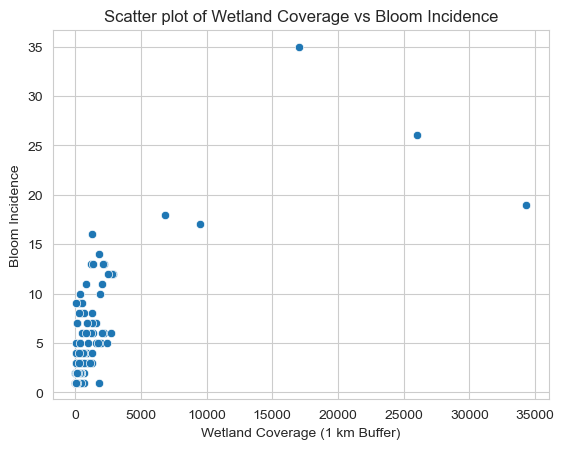

In [550]:
sns.scatterplot(data=filtered_data, x='Wetland_coverage', y='Bloom_count')
plt.xlabel('Wetland Coverage (1 km Buffer)')
plt.ylabel('Bloom Incidence')
plt.title('Scatter plot of Wetland Coverage vs Bloom Incidence')
plt.show()

In [551]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation (if data is normally distributed)
corr, p_value = pearsonr(filtered_data['Wetland_coverage'], filtered_data['Bloom_count'])
print(f"Pearson Correlation: {corr}, p-value: {p_value}")

# Spearman correlation (for non-parametric data)
corr_spearman, p_value_spearman = spearmanr(filtered_data['Wetland_coverage'], filtered_data['Bloom_count'])
print(f"Spearman Correlation: {corr_spearman}, p-value: {p_value_spearman}")


Pearson Correlation: 0.6863984620053467, p-value: 2.891732464053247e-20
Spearman Correlation: 0.714595445476897, p-value: 1.5318636922829802e-22


In [553]:
import statsmodels.api as sm

X = filtered_data[['Wetland_coverage']]  # Independent variable: Wetland coverage
X = sm.add_constant(X)  # Add an intercept (constant)
y = filtered_data['Bloom_count']  # Dependent variable: Bloom incidence

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Bloom_count   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     119.4
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           2.89e-20
Time:                        17:37:51   Log-Likelihood:                -372.74
No. Observations:                 136   AIC:                             749.5
Df Residuals:                     134   BIC:                             755.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.6488      0.340  

# Classification Modeling

In [674]:
bins = [0, 3, 5, 7, float('inf')]
labels = ['Low', 'Moderate', 'High', 'Very High']

test_set = filtered_data.copy()

test_set['bloom_risk'] = pd.cut(test_set['Bloom_count'], bins=bins, labels=labels)

In [613]:
filtered_data['cluster'].value_counts()

cluster
1    96
0    24
3    11
2     5
Name: count, dtype: int64

In [611]:
# Calculate cluster means for classification borders
clusters = filtered_data.groupby(by=['cluster']).agg({'Bloom_count': 'mean'})

In [612]:
clusters

,Bloom_count
cluster,
0,8.000000
1,4.010417
2,2.000000
3,5.545455


In [610]:
cluster_to_risk = {
    0: 'Very High',
    1: 'Moderate',
    2: 'Low',
    3: 'High'
}

filtered_data['bloom_risk'] = filtered_data['cluster'].map(cluster_to_risk)

In [614]:
filtered_data['bloom_risk'].value_counts()

bloom_risk
Moderate     96
Very High    24
High         11
Low           5
Name: count, dtype: int64

In [663]:
test_set['bloom_risk'].value_counts()

bloom_risk
Moderate     49
Low          38
Very High    27
High         22
Name: count, dtype: int64

In [652]:
df = filtered_data.copy()


In [653]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['bloom_risk', 'index', 'NWI_ID_right', 'lake', 'town', 'ATTRIBUTE_right', 'geometry', 'Bloom_count', 'cluster', 'PCA_1', 'PCA_2', 'PCA_3'], axis=1)  # Drop target column from features
y = df['bloom_risk']

imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100), max_iter=10, random_state=42)
imputed_data = imputer.fit_transform(X)

imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

In [629]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(imputed_df, y, test_size=0.3, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8780487804878049
              precision    recall  f1-score   support

        High       1.00      0.67      0.80         3
         Low       0.00      0.00      0.00         2
    Moderate       0.87      1.00      0.93        26
   Very High       0.89      0.80      0.84        10

    accuracy                           0.88        41
   macro avg       0.69      0.62      0.64        41
weighted avg       0.84      0.88      0.85        41


In [630]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000, multi_class='ovr')
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9024390243902439
              precision    recall  f1-score   support

        High       1.00      0.67      0.80         3
         Low       0.00      0.00      0.00         2
    Moderate       0.90      1.00      0.95        26
   Very High       0.90      0.90      0.90        10

    accuracy                           0.90        41
   macro avg       0.70      0.64      0.66        41
weighted avg       0.86      0.90      0.88        41


In [631]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9024390243902439
              precision    recall  f1-score   support

        High       1.00      0.67      0.80         3
         Low       1.00      1.00      1.00         2
    Moderate       0.93      0.96      0.94        26
   Very High       0.80      0.80      0.80        10

    accuracy                           0.90        41
   macro avg       0.93      0.86      0.89        41
weighted avg       0.90      0.90      0.90        41


In [632]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8780487804878049
              precision    recall  f1-score   support

        High       1.00      0.67      0.80         3
         Low       0.00      0.00      0.00         2
    Moderate       0.87      1.00      0.93        26
   Very High       0.89      0.80      0.84        10

    accuracy                           0.88        41
   macro avg       0.69      0.62      0.64        41
weighted avg       0.84      0.88      0.85        41


In [633]:
from sklearn.svm import SVC

# Create and train the Support Vector Machine model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6341463414634146
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         3
         Low       0.00      0.00      0.00         2
    Moderate       0.64      0.96      0.77        26
   Very High       0.50      0.10      0.17        10

    accuracy                           0.63        41
   macro avg       0.29      0.27      0.23        41
weighted avg       0.53      0.63      0.53        41


In [634]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.5853658536585366
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         3
         Low       0.00      0.00      0.00         2
    Moderate       0.64      0.88      0.74        26
   Very High       1.00      0.10      0.18        10

    accuracy                           0.59        41
   macro avg       0.41      0.25      0.23        41
weighted avg       0.65      0.59      0.51        41


In [635]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.926829268292683
              precision    recall  f1-score   support

        High       0.75      1.00      0.86         3
         Low       1.00      1.00      1.00         2
    Moderate       0.93      1.00      0.96        26
   Very High       1.00      0.70      0.82        10

    accuracy                           0.93        41
   macro avg       0.92      0.93      0.91        41
weighted avg       0.94      0.93      0.92        41


In [646]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 95, number of used features: 9
[LightGBM] [Info] Start training from score -2.474435
[LightGBM] [Info] Start training from score -3.455265
[LightGBM] [Info] Start training from score -0.305382
[LightGBM] [Info] Start training from score -1.914820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [648]:
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Gradient Boosting': gb_model,
    'LightGBM': lgb_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print("-" * 80)


Model: Logistic Regression
              precision    recall  f1-score   support

        High       1.00      0.67      0.80         3
         Low       0.00      0.00      0.00         2
    Moderate       0.90      1.00      0.95        26
   Very High       0.90      0.90      0.90        10

    accuracy                           0.90        41
   macro avg       0.70      0.64      0.66        41
weighted avg       0.86      0.90      0.88        41

--------------------------------------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

        High       1.00      0.67      0.80         3
         Low       1.00      1.00      1.00         2
    Moderate       0.93      0.96      0.94        26
   Very High       0.80      0.80      0.80        10

    accuracy                           0.90        41
   macro avg       0.93      0.86      0.89        41
weighted avg       0.90      0.90      0.90        41

-